<a href="https://colab.research.google.com/github/FatemaPromi/Cyclistic-Case-Study/blob/main/bellabeat_a_case_study_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
In this case study, I assumed a role as a junior data analyst and was tasked with helping Bellabeat, a high-tech manufacturer of health-focused smart devices, analyze data to gain insights into consumer behaviour. The goal is to leverage these insights to shape the company's marketing strategy for one of its key products.
This study followed the data analysis process: **Ask**, **Prepare**, **Process**, **Analyze**, **Share**, and **Act**. It uses **RStudio** and **R libraries** for analysis, data cleaning, exploration, and visualization.

## Ask Phase
### Business Task
Bellabeat aimed to grow its market share in the wellness tech industry. My task was to analyze Fitbit dataset insights into how people used their smart devices and apply these insights to a Bellabeat product, providing actionable recommendations to improve marketing strategies and increase customer engagement.

### Key Stakeholders
* Urška Sršen (Cofounder and CCO)
* Sando Mur (Cofounder and Mathematician)
* Bellabeat Marketing Analytics Team

## Prepare Phase
### Datasource
I used the publicly available FitBit Fitness Tracker [Data](http://www.kaggle.com/arashnic/fitbit) from Kaggle. The dataset includes personal tracker data from 30 Fitbit users over a set period, including daily activity levels, sleep records, and more.

### Limitations
* Sample size: 30 people is not a large enough sample to be representative of all FitBit users
* Limited: The dataset does not contain any demographic information about the users, including gender, age, or location, which would be beneficial for marketing purposes to target specific customers.
* Outdated: The dataset contains data only from a few months in 2016. For a deeper and more accurate analysis of trends, we require data preferably collected for an entire year to see if trends vary during different times.

### Data Preparation Steps
* Import the datasets into RStudio.
* Inspect data structure, missing values, and formats.

#### Loading required packages

In [ ]:
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)
library(skimr)
library(here)
library(janitor)


#### Importing Datasets

In [ ]:
activity <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
calories <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
intensities <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
sleep <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")


## Process Phase
### Data Processing
The data is cleaned, transformed, and prepared for analysis using the following steps:
* Removed duplicate records and unnecessary columns.
* Converted date and time columns into appropriate formats
* Merged multiple datasets (activity, sleep, calories) for a comprehensive view.
* Handled missing values.

In [ ]:
# Remove duplicates
sleep_new <- Sleep %>% distinct()

## Renaming ActivityDate column to Date
Activity <- Activity %>%
  rename(Date = ActivityDate)

# Removing 'Fat' column due to lack of data
Weight <- Weight %>% select(-Fat)


# Changing data format of the ActivityDate column in the Activity table
Activity$ActivityDate <- mdy(Activity$ActivityDate)

# Convert ActivityDate data type from character to datetime
Calories <- Calories %>%
  mutate(ActivityDayTime = mdy(ActivityDay)) %>%
  mutate(
    ActivityDay = as.Date(ActivityDayTime),
    ActivityTime = format(ActivityDayTime, "%H:%M:%S")
  )

Intensities <- Intensities %>%
  mutate(ActivityDayTime = mdy(ActivityDay)) %>%
  mutate(
    ActivityDay = as.Date(ActivityDayTime),
    ActivityTime = format(ActivityDayTime, "%H:%M:%S")
  )

hourly_intensities <- hourly_intensities %>%
  mutate(ActivityDateTime = mdy_hms(ActivityHour),
         Date = as.Date(ActivityDateTime),
         Time = format(ActivityDateTime, "%H:%M:%S")
  )

hourly_intensities$ActivityTime <- lubridate::mdy_hms(hourly_intensities$Time)
hourly_intensities$time <- hms::as_hms(hourly_intensities$time)

sleep_new <- sleep_new %>%
  mutate(SleepDayTime = mdy_hms(SleepDay)) %>%
  mutate(
    SleepDay = as.Date(SleepDayTime),
    SleepTime = format(SleepDayTime, "%H:%M:%S")
  )

Activity <- Activity %>%
  mutate(ActivityDateTime = mdy(ActivityDate)) %>%
  mutate(
    ActivityDate = as.Date(ActivityDateTime),
    ActivityTime = format(ActivityDateTime, "%H:%M:%S")
  )

## Renaming SleepDay column to Date
sleep_new <- sleep_new %>%
  rename(Date = SleepDate)

# Check the structure of the updated Activity table
str(sleep_new)

# Optionally, view the first few rows to confirm changes
head(Activity)

class(Activity$ActivityDate)

## Analyze Phase
In this phase, I explored user activity trends by analyzing various metrics.

#### Number of participants

In [ ]:
Activity %>%
  summarise(Activity_participants = n_distinct(Activity$Id))
n_distinct(Calories$Id)
n_distinct(Intensities$Id)
n_distinct(Sleep$Id)
n_distinct(Weight$Id)

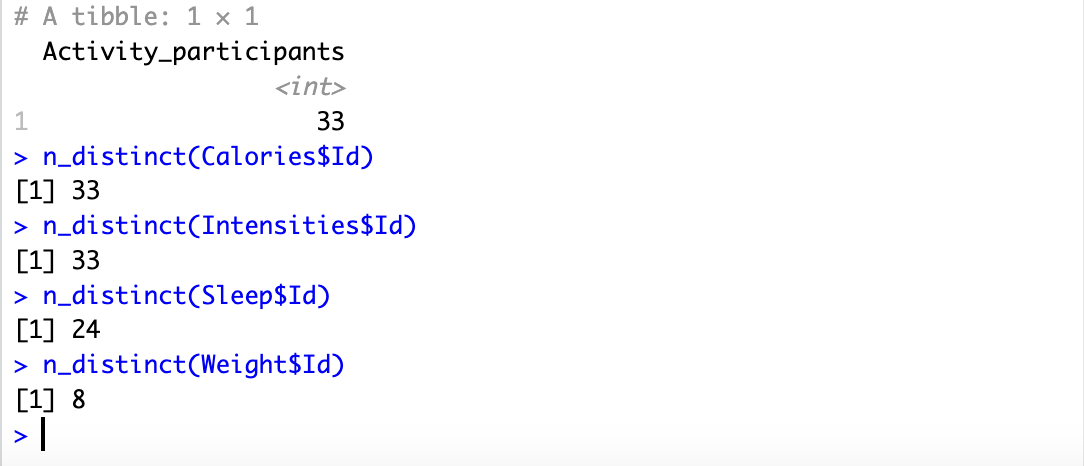

#### User Activity Summary

In [ ]:
Activity %>%
  select(TotalSteps,
         TotalDistance,
         SedentaryMinutes, Calories) %>%
  summary()


   TotalSteps    TotalDistance    SedentaryMinutes    Calories
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :   0
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   1st Qu.:1828
 Median : 7406   Median : 5.245   Median :1057.5   Median :2134
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2   Mean   :2304
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   3rd Qu.:2793
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :4900

#### Active minutes per category

In [ ]:
# activity
Activity %>%
  select(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes) %>%
  summary()

# calories
Calories %>%
  select(Calories) %>%
  summary()

# sleep
sleep_new %>%
  select(TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed) %>%
  summary()

# weight
Weight %>%
  select(WeightKg, BMI) %>%
  summary()


In [ ]:
 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  0.0
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0
 Median :  4.00    Median :  6.00      Median :199.0
 Mean   : 21.16    Mean   : 13.56      Mean   :192.8
 3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0
 Max.   :210.00    Max.   :143.00      Max.   :518.0


    Calories
 Min.   :   0
 1st Qu.:1828
 Median :2134
 Mean   :2304
 3rd Qu.:2793
 Max.   :4900


 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed
 Min.   :1.00      Min.   : 58.0      Min.   : 61.0
 1st Qu.:1.00      1st Qu.:361.0      1st Qu.:403.8
 Median :1.00      Median :432.5      Median :463.0
 Mean   :1.12      Mean   :419.2      Mean   :458.5
 3rd Qu.:1.00      3rd Qu.:490.0      3rd Qu.:526.0
 Max.   :3.00      Max.   :796.0      Max.   :961.0


    WeightKg           BMI
 Min.   : 52.60   Min.   :21.45
 1st Qu.: 61.40   1st Qu.:23.96
 Median : 62.50   Median :24.39
 Mean   : 72.04   Mean   :25.19
 3rd Qu.: 85.05   3rd Qu.:25.56
 Max.   :133.50   Max.   :47.54

#### Key Insights

* **Excessive Sedentary Time**: Participants' average sedentary time is 991 minutes, or approximately 16 hours per day, which is significantly high and should be reduced for better health outcomes.
* **Low Activity Levels**: Most participants are only lightly active, indicating room for improvement in their daily physical activity.
* **Sleep Duration**: On average, participants sleep for 7 hours per night, which aligns with recommended sleep durations but may still benefit from improved sleep quality.
* **Insufficient Step Count**: The average daily step count is 7,638, slightly below the threshold for substantial health benefits.


#### Combining data
I combined datasets using the left_join function before creating visualizations to communicate trends and insights.

In [ ]:
# combining datasets
joined_data <- sleep_new %>%
  left_join(Activity, by = c("Id" = "Id", "Date" = "Date"))

## Share Phase
### Visualizations

In [ ]:
ggplot(data=Activity, aes(x=TotalSteps, y=Calories)) +
  geom_point(colour = "darkolivegreen") + geom_smooth(color = "azure2") + labs(title="Total Steps vs. Calories")

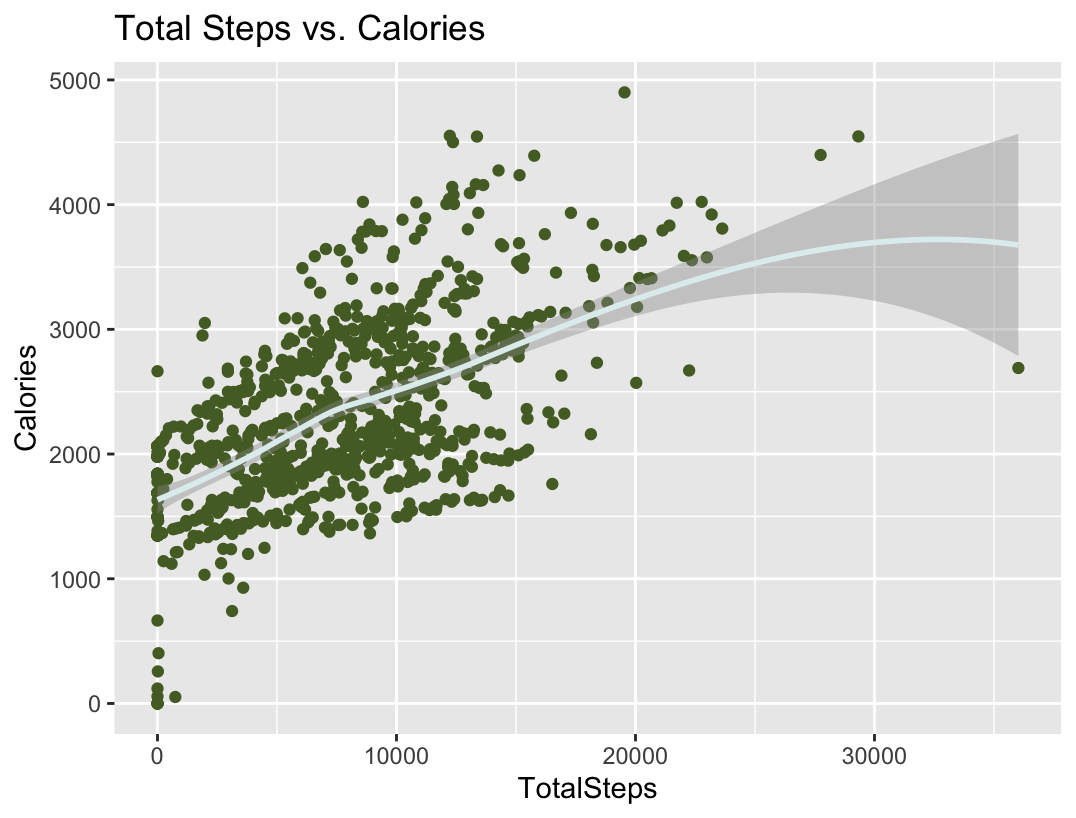
There is a positive correlation between Total Steps and Calories, which proves that the more active we are, the more calories we burn.

In [ ]:
## steps vs sedentary
ggplot(data=Activity, aes(x=TotalSteps, y=SedentaryMinutes)) +
  geom_point(colour = "darkolivegreen4") + geom_smooth(color = "azure4") + labs(title="Total Steps vs. Sedentary Minutes")

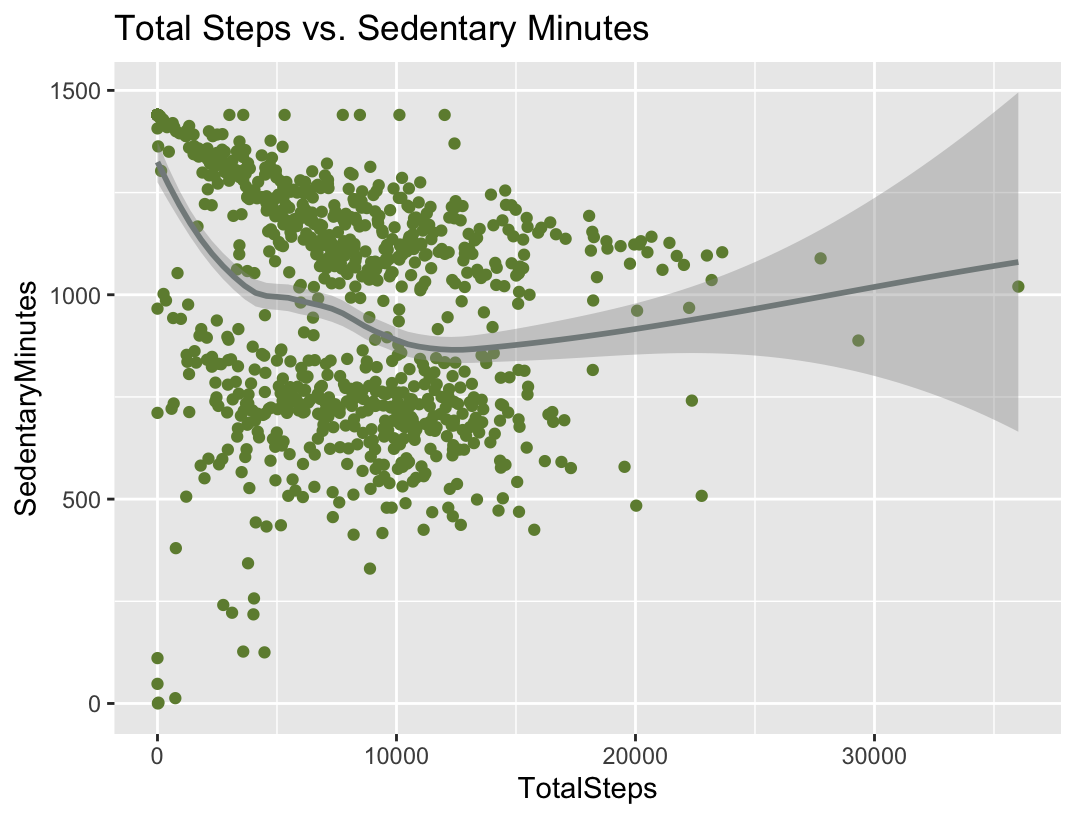
Steps taken and Sedentary time are negatively correlated here.

In [ ]:
## time spent sleeping by time in bed
ggplot(data=sleep_new, aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) +
  geom_point(colour = "darkolivegreen3")+ geom_smooth(color = "azure4") +labs(title="Total Minutes Asleep vs. Total Time in Bed")

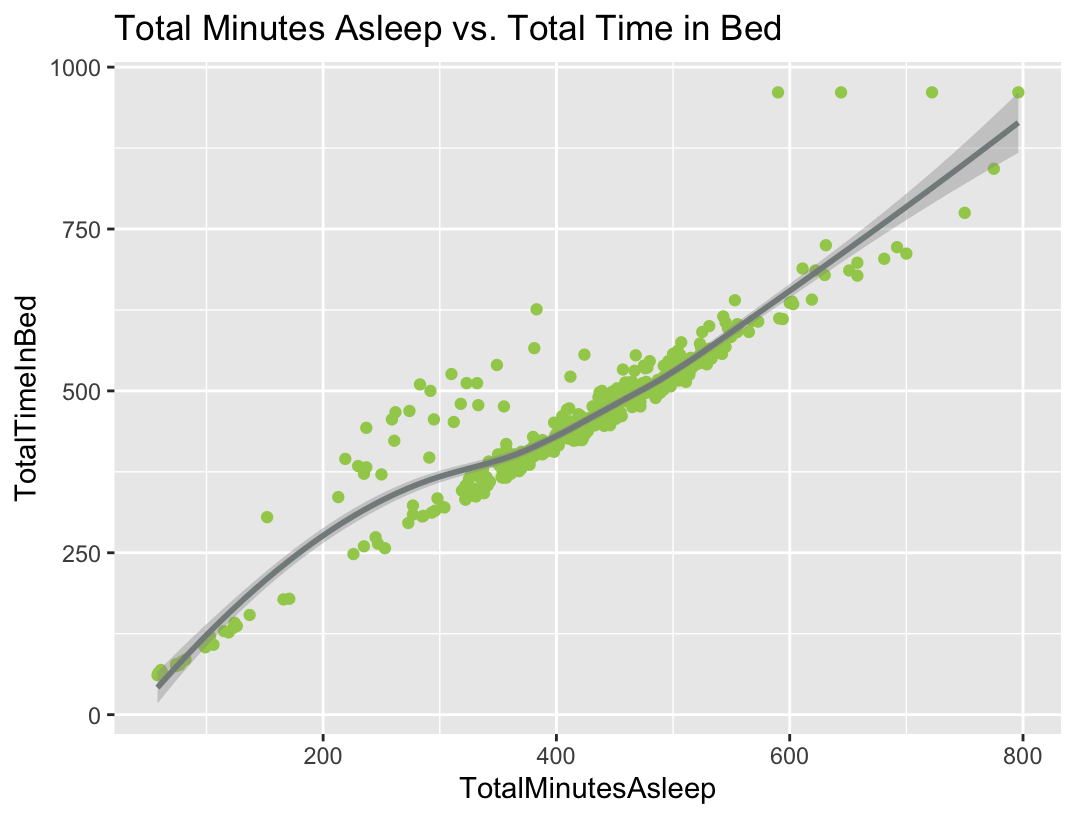
The relationship between Total Minutes Asleep and Total Time in Bed is linear.

In [ ]:
## asleep vs sedentary minutes
ggplot(data=joined_data, aes(x=TotalMinutesAsleep, y=SedentaryMinutes)) +
  geom_point(color='darkolivegreen') + geom_smooth(color = "azure2") +
  labs(title="Minutes Asleep vs. Sedentary Minutes")

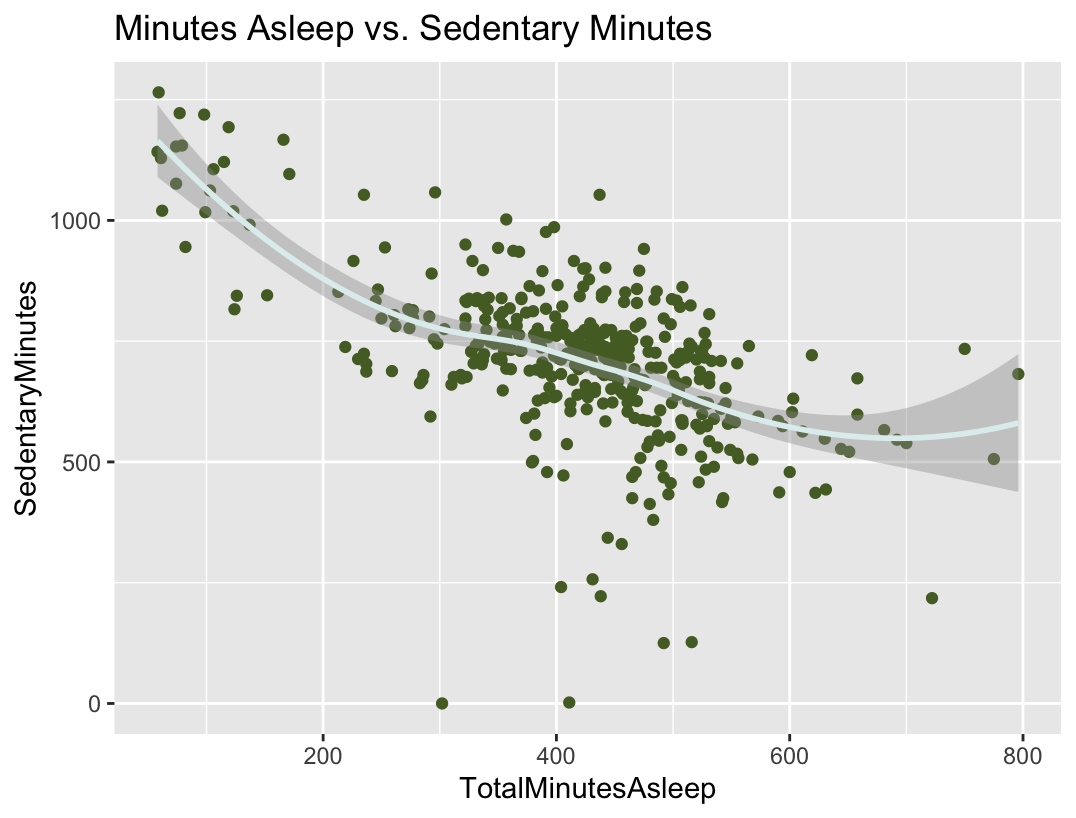

There is a negative relationship between Sedentary Minutes and Sleep time.

In [ ]:
## total hourly intensities
new_hourly_intensities <- hourly_intensities %>%
  group_by(Time) %>%
  drop_na() %>%
  summarise(mean_total_intensity = mean(TotalIntensity))

ggplot(data=new_hourly_intensities, aes(x=Time, y=mean_total_intensity)) +
  geom_histogram(stat = "identity",fill='darkolivegreen4') +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(title="Average Total Intensity vs. Time")

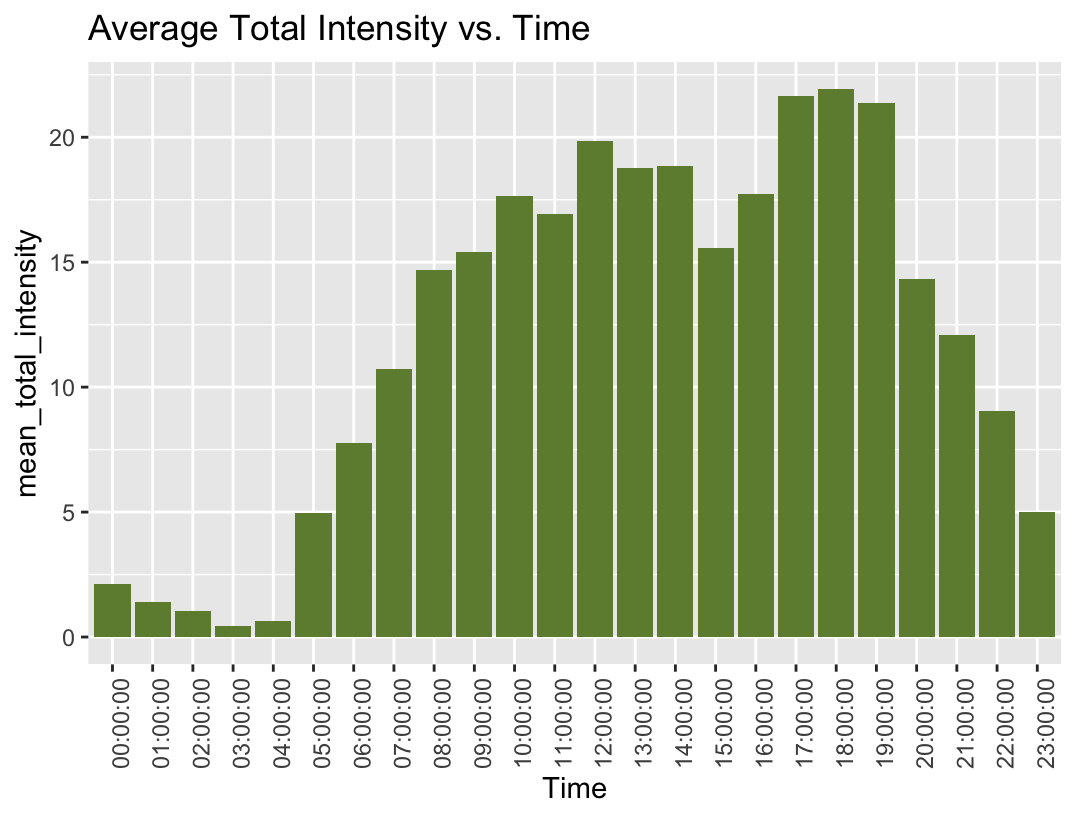
Here, we can see that people are more active between 5 a.m. and 10 p.m., and most activity happens between 5 p.m. and 7 p.m.

## Act Phase
### Recommendations
Based on the analysis of the Fitbit data:

* **Reduce Sedentary Time**:
Bellabeat should focus on promoting more active behaviours among users who spend a lot of time sitting. It should encourage breaks from sitting and promote light activities throughout the day.
It can develop notifications or reminders in the Bellabeat app that encourage users to take breaks and move around after prolonged inactivity, especially for users with high sedentary times.

* **Increase Physical Activity**:
Since many participants are lightly active, Bellabeat should aim to incentivize moderate to vigorous activities. It can introduce in-app challenges or gamify step goals to motivate users to become more active.
It can also create tailored workout routines or step goals specifically designed for users with lower activity levels to help them gradually increase their movement and improve fitness.

* **Improve Step Count**:
Bellabeat can design engaging campaigns, where users are rewarded for consistently meeting step goals.
The Bellabeat app provides personalized insights, showing users their step trends over time and how small increases can result in significant health benefits.

* **Enhance Sleep Quality**:
The app can provide reminders for bedtime routines, track sleep disruptions, and suggest mindfulness activities before sleep to help users enhance sleep quality.

* **Market to Users with High Sedentary Time**:
The data shows a negative correlation between steps and sedentary time, meaning the more sedentary a user has, the fewer steps they take. Bellabeat should target marketing efforts to users with high sedentary time by promoting the benefits of simple activities like walking and tracking daily steps through the app.

* **Leverage Hourly Activity Patterns**:
Since users are most active between 5 p.m. and 7 p.m., Bellabeat can create targeted notifications during these peak hours to promote higher-intensity exercises or activities during this window of time.

* **Highlight Relationship Between Activity and Health**:
Positive correlations between steps and calorie burn should be highlighted in marketing campaigns to emphasize the importance of staying active for weight management and overall health.
Bellabeat can integrate real-time feedback within the app, showing users how increased steps lead to more significant calorie burn, helping to reinforce the value of staying active.

* **Promote Mindfulness and Rest**:
Given the negative relationship between sedentary minutes and sleep time, Bellabeat can introduce content focusing on relaxation techniques to promote better rest and recovery. This will help users manage their sedentary time more effectively.This will also encourage users to track their sleep habits more rigorously and provide insights that help them optimize both their daytime activity and nighttime rest.
